# Statistical analysis by Parametric Test(2.Anova Test)


# step 1:Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
one_anova=pd.read_csv("C:/Users/Admin/Downloads/retail_oneway_anova_dataset.csv")
two_anova=pd.read_csv("C:/Users/Admin/Downloads/retail_twoway_anova_dataset.csv")


In [3]:
one_anova

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_size
0,7,1284.466734,725,506,20568.040633,11,Medium
1,15,1435.965854,1324,509,23637.098858,18,Medium
2,11,1593.272270,2765,500,11176.428748,33,Large
3,8,1942.606865,1436,537,28693.108672,23,Small
4,7,1757.297887,2806,468,17844.150571,23,Medium
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,Medium
496,7,1549.935662,2838,498,20665.482229,32,Large
497,13,1647.735379,2463,500,23683.745244,29,Small
498,4,1586.750593,2649,528,20061.609082,20,Medium


In [4]:
one_anova.describe().T

,count,mean,std,min,25%,50%,75%,max
store_id,500.0,9.616000,5.662922,1.000000,4.750000,9.000000,15.000000,19.000000
store_area,500.0,1500.033666,299.278880,690.934007,1288.959528,1494.370598,1692.086499,2423.664243
items_available,500.0,1761.688000,713.102689,501.000000,1185.500000,1765.500000,2425.000000,2977.000000
daily_customer_count,500.0,499.588000,21.834003,438.000000,483.000000,500.000000,515.000000,565.000000
monthly_sales,500.0,22442.763482,5137.782731,7492.381587,19378.585124,22570.226365,25626.600346,38302.455403
num_employees,500.0,27.006000,12.525324,5.000000,17.000000,26.000000,37.000000,49.000000


In [5]:
one_anova.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales           0
num_employees           0
store_size              0
dtype: int64

In [6]:
one_anova.duplicated().sum()

0

In [7]:
one_anova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_id              500 non-null    int64  
 1   store_area            500 non-null    float64
 2   items_available       500 non-null    int64  
 3   daily_customer_count  500 non-null    int64  
 4   monthly_sales         500 non-null    float64
 5   num_employees         500 non-null    int64  
 6   store_size            500 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 27.5+ KB


# Step 2: Distribution of Store_size and monthly sales

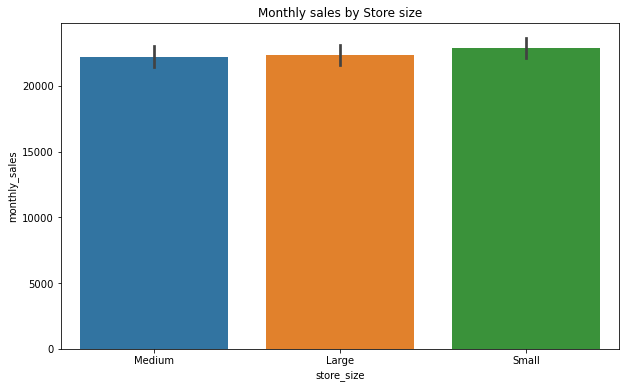

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='store_size',y='monthly_sales',data=one_anova)
plt.title('Monthly sales by Store size')
plt.show()

# 1.one way anova


In [9]:
#perform one way anova
from scipy import stats
medium_size=one_anova[one_anova['store_size']=='Medium']['monthly_sales']
large_size=one_anova[one_anova['store_size']=='Large']['monthly_sales']
small_size=one_anova[one_anova['store_size']=='Small']['monthly_sales']

f_statistics,p_value=stats.f_oneway(medium_size,large_size,small_size)

#print the one way anova result
print("\nOne-Way ANOVA Results:\n")
print(f"ANOVA F-Statistic: {f_statistics}")
print(f"ANOVA p-value: {p_value}",'\n')

#determine if we reject null hypothesis
alpha=0.05
if p_value<alpha:
    print('Reject Null Hypothesis: There is significant difference in monthly sales among stores of different sizes')
else:
     print(' Fail to Reject Null Hypothesis: There is not enough  evidence to say that there is significant difference in monthly sales among stores of different sizes')



One-Way ANOVA Results:

ANOVA F-Statistic: 0.6813172566840775
ANOVA p-value: 0.5064219975629329 

 Fail to Reject Null Hypothesis: There is not enough  evidence to say that there is significant difference in monthly sales among stores of different sizes


# 2.Two way anova

In [27]:
two_anova

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_size,store_location
0,7,1284.466734,725,506,20568.040633,11,Medium,Urban
1,15,1435.965854,1324,509,23637.098858,18,Medium,Urban
2,11,1593.272270,2765,500,11176.428748,33,Large,Urban
3,8,1942.606865,1436,537,28693.108672,23,Small,Urban
4,7,1757.297887,2806,468,17844.150571,23,Medium,Rural
...,...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,Medium,Rural
496,7,1549.935662,2838,498,20665.482229,32,Large,Urban
497,13,1647.735379,2463,500,23683.745244,29,Small,Rural
498,4,1586.750593,2649,528,20061.609082,20,Medium,Rural


# EDA(Exploratory Data analysis)

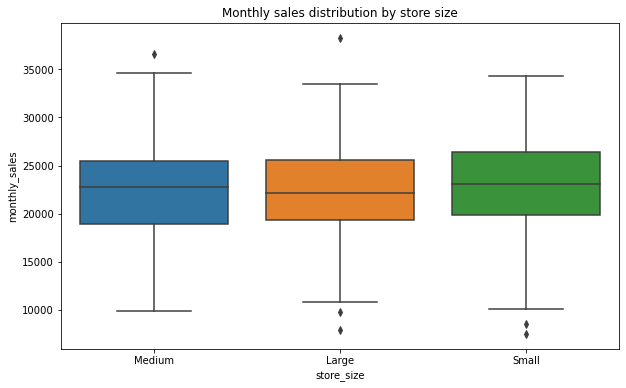

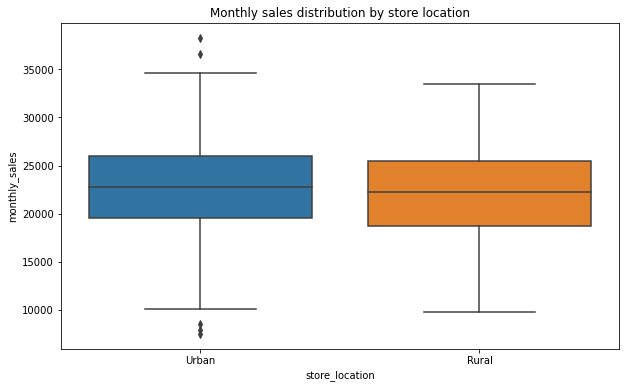

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='store_size',y='monthly_sales',data=two_anova)
plt.title("Monthly sales distribution by store size")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='store_location',y='monthly_sales',data=two_anova)
plt.title("Monthly sales distribution by store location")
plt.show()

In [11]:
#perform two way anova
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula='monthly_sales ~ C(store_size) * C(store_location)'
model=ols(formula,data=two_anova).fit()
anova_table=anova_lm(model,typ=2)

#print anova table
print("ANOVA Table for two_way ANOVA:\n",anova_table)


# Print the ANOVA table for inspection
print(anova_table)

# Check for NaN values in the ANOVA table
print("NaN Values in ANOVA Table:\n", anova_table.isnull().any(),'\n')

# Access the interaction p-value from the ANOVA table
interaction_p_value = anova_table.loc['C(store_size):C(store_location)', 'PR(>F)']
alpha = 0.05

# Print the interaction effect conclusion based on the p-value
if interaction_p_value < alpha:
    print("There is a significant interaction effect between store size and location on monthly sales.")
else:
    print("There is not enough evidence to suggest a significant interaction effect between store size and location on monthly sales.")

ANOVA Table for two_way ANOVA:
                                        sum_sq     df         F    PR(>F)
C(store_size)                    3.279510e+07    2.0  0.619231  0.538775
C(store_location)                3.202078e+07    1.0  1.209222  0.272022
C(store_size):C(store_location)  2.261387e+07    2.0  0.426991  0.652710
Residual                         1.308136e+10  494.0       NaN       NaN
                                       sum_sq     df         F    PR(>F)
C(store_size)                    3.279510e+07    2.0  0.619231  0.538775
C(store_location)                3.202078e+07    1.0  1.209222  0.272022
C(store_size):C(store_location)  2.261387e+07    2.0  0.426991  0.652710
Residual                         1.308136e+10  494.0       NaN       NaN
NaN Values in ANOVA Table:
 sum_sq    False
df        False
F          True
PR(>F)     True
dtype: bool 

There is not enough evidence to suggest a significant interaction effect between store size and location on monthly sales.


# 3.Repeated Measure anova

In [12]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM


repeated_measures_anova=pd.read_csv("C:/Users/Admin/Downloads/retail_repeated_measures_anova_dataset.csv")

In [13]:
repeated_measures_anova

,store_id,store_area,items_available,daily_customer_count,quarter_1_sales,quarter_2_sales,quarter_3_sales,quarter_4_sales,num_employees
0,7,1284.466734,725,506,19568.040633,27220.955444,24511.556526,28579.926780,17
1,15,1435.965854,1324,509,22637.098858,37609.484487,26764.136069,27746.829711,45
2,11,1593.272270,2765,500,10176.428748,20191.200558,21016.275105,27048.667839,19
3,8,1942.606865,1436,537,27693.108672,28076.607873,21671.121518,32295.477605,46
4,7,1757.297887,2806,468,16844.150571,20370.443436,23014.052578,16055.263585,11
...,...,...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,29127.336710,17080.335584,16154.317313,28720.030713,9
496,7,1549.935662,2838,498,19665.482229,20640.898484,19555.838028,21688.237381,30
497,13,1647.735379,2463,500,22683.745244,19000.855617,23713.741680,26057.241638,15
498,4,1586.750593,2649,528,19061.609082,16168.810531,21056.417545,17143.165659,11


In [14]:
repeated_measures_anova.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
quarter_1_sales         0
quarter_2_sales         0
quarter_3_sales         0
quarter_4_sales         0
num_employees           0
dtype: int64

# EDA(Exploratory Data Analysis)

In [15]:
import scipy.stats as stats

# Reshape the data from wide to long format
long_data = pd.melt(repeated_measures_anova, id_vars=['store_id'], 
                    value_vars=['quarter_1_sales', 'quarter_2_sales', 'quarter_3_sales', 'quarter_4_sales'],
                    var_name='quarter', value_name='monthly_sales')

# Display the reshaped data
print(long_data.head(),'\n')

# Perform one-way ANOVA
anova_result = stats.f_oneway(
    long_data[long_data['quarter'] == 'quarter_1_sales']['monthly_sales'],
    long_data[long_data['quarter'] == 'quarter_2_sales']['monthly_sales'],
    long_data[long_data['quarter'] == 'quarter_3_sales']['monthly_sales'],
    long_data[long_data['quarter'] == 'quarter_4_sales']['monthly_sales']
)

# Print the ANOVA result
print('F-statistic:', anova_result.statistic)
print('p-value:', anova_result.pvalue,'\n')

# Set significance level
alpha = 0.05

# Make a decision based on the p-value
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in monthly sales across different quarters.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in monthly sales across different quarters.")



   store_id          quarter  monthly_sales
0         7  quarter_1_sales   19568.040633
1        15  quarter_1_sales   22637.098858
2        11  quarter_1_sales   10176.428748
3         8  quarter_1_sales   27693.108672
4         7  quarter_1_sales   16844.150571 

F-statistic: 29.872276781268386
p-value: 6.881545087670228e-19 

Reject the null hypothesis. There is a significant difference in monthly sales across different quarters.


 # 4. MAnova(Multivariant Anaysis of variant):

In [16]:
#load the dataset
manova=pd.read_csv("C:/Users/Admin/Downloads/retail_manova_dataset.csv")

In [17]:
manova.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales           0
num_employees           0
store_type              0
dtype: int64

In [18]:
manova.describe()

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.616000,1500.033666,1761.688000,499.588000,22442.763482,27.006000
std,5.662922,299.278880,713.102689,21.834003,5137.782731,12.525324
min,1.000000,690.934007,501.000000,438.000000,7492.381587,5.000000
25%,4.750000,1288.959528,1185.500000,483.000000,19378.585124,17.000000
50%,9.000000,1494.370598,1765.500000,500.000000,22570.226365,26.000000
75%,15.000000,1692.086499,2425.000000,515.000000,25626.600346,37.000000
max,19.000000,2423.664243,2977.000000,565.000000,38302.455403,49.000000


In [19]:
manova

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_type
0,7,1284.466734,725,506,20568.040633,11,Corporate
1,15,1435.965854,1324,509,23637.098858,18,Corporate
2,11,1593.272270,2765,500,11176.428748,33,Independent
3,8,1942.606865,1436,537,28693.108672,23,Franchise
4,7,1757.297887,2806,468,17844.150571,23,Corporate
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,Corporate
496,7,1549.935662,2838,498,20665.482229,32,Independent
497,13,1647.735379,2463,500,23683.745244,29,Franchise
498,4,1586.750593,2649,528,20061.609082,20,Corporate


In [20]:
from statsmodels.multivariate.manova import MANOVA

# Perform MANOVA
manova = MANOVA.from_formula('monthly_sales + daily_customer_count + items_available ~ store_type', data=manova)

# Fit the model and get the results
manova_results = manova.mv_test()

# Print the MANOVA results
print(manova_results)



                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0053 3.0000 495.0000 30797.6579 0.0000
         Pillai's trace   0.9947 3.0000 495.0000 30797.6579 0.0000
 Hotelling-Lawley trace 186.6525 3.0000 495.0000 30797.6579 0.0000
    Roy's greatest root 186.6525 3.0000 495.0000 30797.6579 0.0000
------------------------------------------------------------------
                                                                  
-------------------------------------------------------------------
        store_type        Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.9936  6.0000  990.0000   0.5270  0.7881
          Pi

In [21]:
# Extract the p-values from the MANOVA results
p_values = manova_results.results['store_type']['stat']['Pr > F']

# Set significance level
alpha = 0.05

# Make a decision based on the p-values
if all(p < alpha for p in p_values):
    print("Reject the null hypothesis. There is a significant difference in store performance metrics among different store types.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in store performance metrics among different store types.")



Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in store performance metrics among different store types.
